In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),
                                                    df['Survived'],
                                                    test_size=0.2)                        

In [16]:
X_train.shape

(712, 3)

In [17]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [22]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
630,80.0,30.000,0,80.0,80.0,30.000,30.000
17,NaN,13.000,0,99.0,-1.0,13.000,13.000
435,14.0,120.000,3,14.0,14.0,120.000,120.000
238,19.0,10.500,0,19.0,19.0,10.500,10.500
885,39.0,29.125,5,39.0,39.0,29.125,29.125


<Axes: ylabel='Density'>

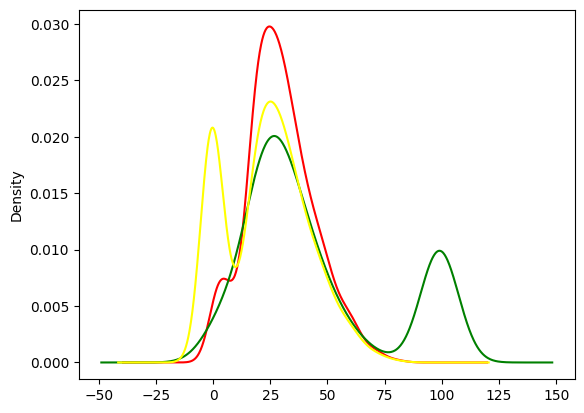

In [23]:
X_train['Age'].plot(kind='kde',color='red')
X_train['Age_99'].plot(kind='kde',color='green')
X_train['Age_minus1'].plot(kind='kde',color='yellow')

In [24]:
#using sklearn
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),
                                                    df['Survived'],
                                                    test_size=0.2)  
imputer1 = SimpleImputer(strategy='constant',fill_value = 99)
imputer2 = SimpleImputer(strategy='constant',fill_value = 999)

In [25]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [26]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [32]:
X_train

array([[ 40.    , 153.4625,   0.    ],
       [  7.    ,  39.6875,   5.    ],
       [ 99.    ,   8.6625,   0.    ],
       ...,
       [ 35.    ,  53.1   ,   1.    ],
       [ 27.    , 211.5   ,   2.    ],
       [ 24.    ,  13.    ,   0.    ]], shape=(712, 3))

In [27]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [29]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [30]:
X_train

array([[ 40.    , 153.4625,   0.    ],
       [  7.    ,  39.6875,   5.    ],
       [ 99.    ,   8.6625,   0.    ],
       ...,
       [ 35.    ,  53.1   ,   1.    ],
       [ 27.    , 211.5   ,   2.    ],
       [ 24.    ,  13.    ,   0.    ]], shape=(712, 3))